### 1.	Baca dataset menggunakan Python (library Pandas). ###

In [2]:
import pandas as pd
file_path = "D:/ARSIP/Testing/container.csv"
df = pd.read_csv(file_path).rename(columns={'Unnamed: 0': 'id'})

In [3]:
for container in ['10', '20', '40', 'other']:
    df[f'Total_{container}'] = df[f'Full_{container}'] + df[f'Empty_{container}']

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [5]:
df = df[['Harbor','Year','Month','Total_10','Total_20','Total_40','Total_other']]

In [6]:
df.head()

,Harbor,Year,Month,Total_10,Total_20,Total_40,Total_other
0,Busan,2018,1,438,77035,73607,214
1,Busan,2018,1,294,413661,525109,3584
2,Busan,2018,2,311,73346,67847,107
3,Busan,2018,2,327,400232,524327,3935
4,Busan,2018,3,266,77120,73304,210


TEU adalah singkatan dari "twenty-foot equivalent unit",
Oleh sebab itu untuk menentukan capacity TEU dengan berikut ini:
Konversi:
Kontainer 10 = 0.5 TEU
Kontainer 20 = 1 TEU
Kontainer 40 = 2 TEU
Kontainer Other = Asumsi juga sebagai 1 TEU

In [8]:
df['Capacity'] = df['Total_10'] * 0.5 + df['Total_20'] * 1 + df['Total_40'] * 2 + df['Total_other'] * 1

In [9]:
df.head()

,Harbor,Year,Month,Total_10,Total_20,Total_40,Total_other,Capacity
0,Busan,2018,1,438,77035,73607,214,224682.0
1,Busan,2018,1,294,413661,525109,3584,1467610.0
2,Busan,2018,2,311,73346,67847,107,209302.5
3,Busan,2018,2,327,400232,524327,3935,1452984.5
4,Busan,2018,3,266,77120,73304,210,224071.0


## 2. Hitung rata-rata kapasitas kontainer setiap pelabuhan per tahun. ##

In [11]:
result_2 = df.groupby(['Harbor', 'Year'])['Capacity'].mean().reset_index()

In [12]:
result_2

,Harbor,Year,Capacity
0,Busan,2018,899658.166667
1,Busan,2019,913452.791667
2,Busan,2020,897098.850000
3,Daesan,2018,3783.958333
4,Daesan,2019,3077.916667
5,Daesan,2020,4299.600000
6,"East Sea, Mukho",2018,81.666667
7,"East Sea, Mukho",2019,77.458333
8,"East Sea, Mukho",2020,0.000000
9,Gunsan,2018,3341.583333


### 3.	Identifikasi pelabuhan dengan kapasitas kontainer tertinggi rata-rata setiap tahun. ###

In [14]:
result_3 = result_2.loc[result_2.groupby('Year')['Capacity'].idxmax()]

In [15]:
result_3

,Harbor,Year,Capacity
0,Busan,2018,899658.166667
1,Busan,2019,913452.791667
2,Busan,2020,897098.850000


### 4.	Buat visualisasi tren kapasitas kontainer bulanan untuk setiap pelabuhan. ###

In [17]:
result_4 = df.groupby(['Harbor', 'Month'])['Capacity'].sum().reset_index()

In [18]:
result_4

,Harbor,Month,Capacity
0,Busan,1,5282207.5
1,Busan,2,5038654.0
2,Busan,3,5594479.0
3,Busan,4,5456888.0
4,Busan,5,5493770.5
...,...,...,...
139,Ulsan,8,85163.0
140,Ulsan,9,85831.0
141,Ulsan,10,86353.0
142,Ulsan,11,79246.0


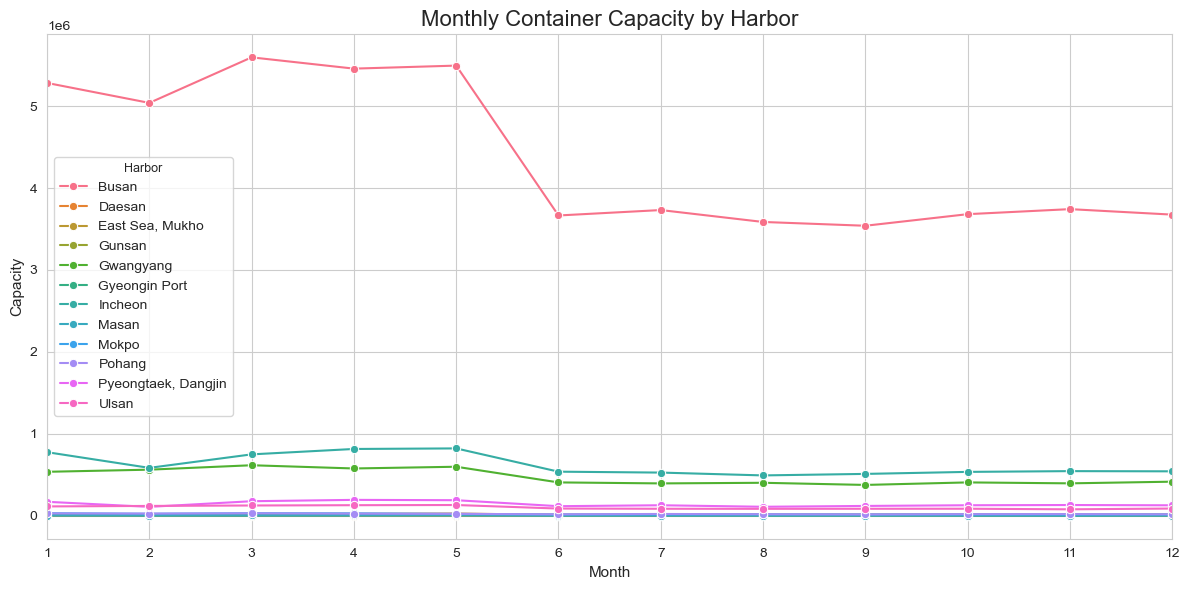

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=result_4, x='Month', y='Capacity', hue='Harbor', marker='o')
plt.title('Monthly Container Capacity by Harbor', fontsize=16)
plt.xlabel('Month', fontsize=11)
plt.ylabel('Capacity', fontsize=11)
plt.legend(title='Harbor', title_fontsize=9)
plt.xticks(range(1, 13))
plt.xlim(1, 12)
plt.tight_layout()
plt.show()

### 5.	Simpan hasil analisis ke dalam file CSV bernama port_analysis_results.csv. ###

In [21]:
with open('port_analysis_results.csv', 'a') as f:
    result_2.to_csv('port_analysis_results.csv', index=False)
    f.write("\nrata-rata kapasitas kontainer setiap pelabuhan per tahun\n")
    f.write("\n")

with open('port_analysis_results.csv', 'a') as f:
    result_3.to_csv('port_analysis_results.csv', mode='a', header=False, index=False)
    f.write("\n")
    f.write("pelabuhan dengan kapasitas kontainer tertinggi rata-rata setiap tahun") 